In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
import math
from sklearn.metrics import mean_squared_error

In [7]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from ipywidgets import interactive

# Load Dataset

In [8]:
dataset = pd.read_csv('datasets/IBM-Historical-Data.csv', index_col='Date', parse_dates=['Date'])

In [9]:
dataset.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-11-26,135.09,136.15,136.15,134.77,3.79M,-0.65%
2019-11-25,135.97,134.47,136.00,134.35,2.59M,1.21%
2019-11-22,134.34,134.19,134.65,133.59,3.30M,0.37%
2019-11-21,133.84,133.40,134.17,132.98,3.35M,0.48%
2019-11-20,133.20,134.06,134.46,132.75,4.14M,-0.98%


In [10]:
dataset = dataset.sort_index()
training_set = dataset[:'2015'].iloc[:,1:2].values
test_set = dataset['2016':].iloc[:,1:2].values

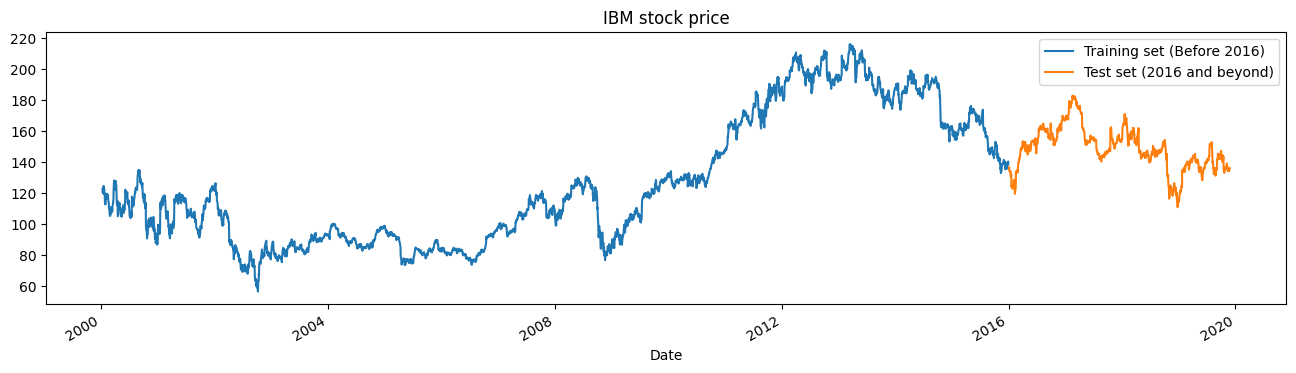

In [11]:
dataset["High"][:'2015'].plot(figsize=(16,4),legend=True)
dataset["High"]['2016':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2016)','Test set (2016 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [12]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [13]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [14]:
X_train = []
y_train = []
for i in range(60,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

# GRU

In [16]:
model = Sequential()
model.add(GRU(62, return_sequences=True, input_shape=X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train,y_train,epochs=15,batch_size=150)

Epoch 1/15
27/27 [==============================] - 5s 105ms/step - loss: 0.0291
Epoch 2/15
27/27 [==============================] - 3s 96ms/step - loss: 0.0021
Epoch 3/15
27/27 [==============================] - 2s 88ms/step - loss: 0.0015
Epoch 4/15
27/27 [==============================] - 2s 91ms/step - loss: 0.0013
Epoch 5/15
27/27 [==============================] - 3s 93ms/step - loss: 0.0013
Epoch 6/15
27/27 [==============================] - 2s 92ms/step - loss: 0.0013
Epoch 7/15
27/27 [==============================] - 2s 92ms/step - loss: 0.0012
Epoch 8/15
27/27 [==============================] - 3s 103ms/step - loss: 0.0012
Epoch 9/15
27/27 [==============================] - 3s 104ms/step - loss: 0.0012
Epoch 10/15
27/27 [==============================] - 3s 97ms/step - loss: 0.0012
Epoch 11/15
27/27 [==============================] - 2s 92ms/step - loss: 0.0012
Epoch 12/15
27/27 [==============================] - 3s 93ms/step - loss: 0.0011
Epoch 13/15
27/27 [===============

In [17]:
dataset_total = pd.concat((dataset["High"][:'2015'],dataset["High"]['2016':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [18]:
X_test = []
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

31/31 [==============================] - 1s 8ms/step


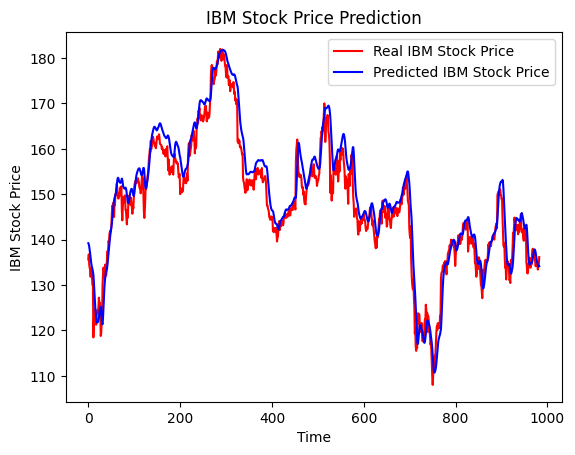

In [19]:
plot_predictions(test_set,predicted_stock_price)

In [20]:
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 3.8093618261408744.


# LSTM

In [21]:
model = Sequential()
model.add(LSTM(62, return_sequences=True, input_shape=X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train,y_train,epochs=15,batch_size=150)

Epoch 1/15
27/27 [==============================] - 5s 113ms/step - loss: 0.0292
Epoch 2/15
27/27 [==============================] - 3s 116ms/step - loss: 0.0042
Epoch 3/15
27/27 [==============================] - 3s 115ms/step - loss: 0.0025
Epoch 4/15
27/27 [==============================] - 3s 119ms/step - loss: 0.0021
Epoch 5/15
27/27 [==============================] - 3s 123ms/step - loss: 0.0018
Epoch 6/15
27/27 [==============================] - 3s 117ms/step - loss: 0.0017
Epoch 7/15
27/27 [==============================] - 3s 119ms/step - loss: 0.0015
Epoch 8/15
27/27 [==============================] - 3s 118ms/step - loss: 0.0015
Epoch 9/15
27/27 [==============================] - 4s 146ms/step - loss: 0.0014
Epoch 10/15
27/27 [==============================] - 3s 130ms/step - loss: 0.0014
Epoch 11/15
27/27 [==============================] - 3s 120ms/step - loss: 0.0013
Epoch 12/15
27/27 [==============================] - 3s 121ms/step - loss: 0.0013
Epoch 13/15
27/27 [======

In [22]:
lstm_predicted_stock_price = model.predict(X_test)
lstm_predicted_stock_price = sc.inverse_transform(lstm_predicted_stock_price)

31/31 [==============================] - 1s 9ms/step


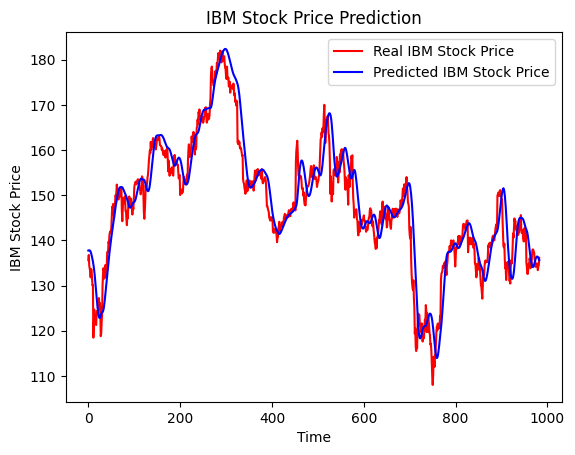

In [23]:
plot_predictions(test_set,lstm_predicted_stock_price)

In [24]:
return_rmse(test_set,lstm_predicted_stock_price)

The root mean squared error is 4.72079416904732.


In [25]:
def plot_interactive_predictions(test, predicted):
    # Create subplot with plotly
    fig = make_subplots(rows=1, cols=1)

    # Plot real IBM stock prices
    real_trace = go.Scatter(x=list(range(len(test))), y=test, mode='lines', name='Real IBM Stock Price', line=dict(color='red'))
    fig.add_trace(real_trace)

    # Initialize empty trace for predicted values
    pred_trace = go.Scatter(x=[], y=[], mode='lines', name='Predicted IBM Stock Price', line=dict(color='blue'))
    fig.add_trace(pred_trace)

    # Define update function for interactive widget
    def update_plot(scroll):
        # Update the predicted trace based on the scroll value
        pred_trace.x = list(range(len(test)))
        pred_trace.y = predicted[:len(test) - scroll]

        # Update layout
        fig.update_layout(title='IBM Stock Price Prediction',
                          xaxis=dict(title='Time'),
                          yaxis=dict(title='IBM Stock Price'),
                          showlegend=True)

    # Create interactive widget for scrolling
    scroll_widget = widgets.IntSlider(value=0, min=0, max=len(predicted), step=1, description='Scroll:')
    interactive_plot = interactive(update_plot, scroll=scroll_widget)

    # Display the interactive plot
    display(interactive_plot)

In [26]:
plot_interactive_predictions(test_set, predicted_stock_price)

interactive(children=(IntSlider(value=0, description='Scroll:', max=983), Output()), _dom_classes=('widget-int…